In [1]:
# Import required packages 
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
random_state=0
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
rng = np.random.RandomState(seed=random_state)
%matplotlib inline

In [2]:
path_data = os.path.join(os.getcwd(),'train_data.csv')
flights_train = pd.read_csv(path_data, delimiter = ',')

In [3]:
path_data = os.path.join(os.getcwd(),'test_data.csv')
flights_test = pd.read_csv(path_data, delimiter = ',')

In [4]:
X_train_full = flights_train.drop('ARR_DELAY_GROUP', axis=1).values.astype(np.float) # Training features
y_train_full = flights_train['ARR_DELAY_GROUP'].values # Training labels
X_test = flights_test.drop('ARR_DELAY_GROUP', axis=1).values.astype(np.float) # Training features
y_test = flights_test['ARR_DELAY_GROUP'].values # Training labels

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.2, random_state=random_state)

In [6]:
sc = StandardScaler().fit(X_train)
X_train_sc = sc.transform(X_train)
X_val_sc = sc.transform(X_val)
X_test_sc = sc.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from scipy.stats import mode # Computes the mode of a signal
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score, make_scorer
kappa_scorer = make_scorer(cohen_kappa_score)
names = ["Logistic Regression", "Nearest Neighbors",
         "Decision Tree", "Random Forest", "Neural Net (Multi-layer perceptron)",
         "Naive Bayes", "LDA", "QDA"]
classifiers = [
    LogisticRegression(solver='lbfgs', multi_class='multinomial'),
    KNeighborsClassifier(n_neighbors=10),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
kc_score = {} #kappa score
print('Classification performance on validation set:')
for name, clf in zip(names, classifiers):
    clf.fit(X_train_sc, y_train)
    ca_score[name] = clf.score(X_val_sc, y_val)
    ce_score[name] = log_loss(y_val, clf.predict_proba(X_val_sc))
    kc_score[name] = metrics.f1_score(y_val, clf.predict(X_val_sc), average='weighted')
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}, f1 score: {:.3f}".format(name, ca_score[name], ce_score[name], kc_score[name]))




Classification performance on validation set:
Logistic Regression, accuracy: 0.557, log-loss: 1.159, f1 score: 0.530
Nearest Neighbors, accuracy: 0.417, log-loss: 5.583, f1 score: 0.357


C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree, accuracy: 0.545, log-loss: 1.718, f1 score: 0.514


C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest, accuracy: 0.533, log-loss: 1.395, f1 score: 0.484
Neural Net (Multi-layer perceptron), accuracy: 0.521, log-loss: 1.383, f1 score: 0.510
Naive Bayes, accuracy: 0.410, log-loss: 12.843, f1 score: 0.323


C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDA, accuracy: 0.546, log-loss: 1.599, f1 score: 0.526
QDA, accuracy: 0.047, log-loss: 32.580, f1 score: 0.047


In [19]:
kappa_scorer = make_scorer(cohen_kappa_score)
names = ["Logistic Regression"]
classifiers = [LogisticRegression(solver='lbfgs', multi_class='multinomial')]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
kc_score = {} #kappa score
print('Classification performance on validation set:')
for name, clf in zip(names, classifiers):
    clf.fit(X_train_sc, y_train)
    ca_score[name] = clf.score(X_val_sc, y_val)
    ce_score[name] = log_loss(y_val, clf.predict_proba(X_val_sc))
    kc_score[name] = cohen_kappa_score(y_val,clf.predict(X_val_sc))
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}, kappa score: {:.3f}".format(name, ca_score[name], ce_score[name], kc_score[name]))



Classification performance on validation set:
Logistic Regression, accuracy: 0.557, log-loss: 1.159, kappa score: 0.437


In [17]:
cv = KFold(n_splits=3, shuffle=True, random_state=random_state)
svc = LogisticRegression(penalty='l2'
        ,fit_intercept=True
        ,solver='newton-cg'
        ,multi_class='multinomial')
parameters = {'C': np.logspace(-3,3,7)}
svc_clf = GridSearchCV(estimator=svc, cv=cv, param_grid=parameters, scoring='accuracy')
svc_clf.fit(X_train_sc, y_train)
print("Best setting of C parameter for SVC with RBF kernel: {}".format(svc_clf.best_params_["C"]))
print("Best cross-validated score: {:.3f}".
      format(svc_clf.best_score_))
print("Classification accuracy on validation set: {:.3f}".format(svc_clf.score(X_val_sc,y_val)))

C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\chris\Anaconda3\envs\mlp\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


Best setting of C parameter for SVC with RBF kernel: 0.001
Best cross-validated score: 0.560
Classification accuracy on validation set: 0.553


In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
kappa_scorer = make_scorer(cohen_kappa_score)
names = ["Logistic Regression"]
classifiers = [LogisticRegression(C=0.001,solver='lbfgs', multi_class='multinomial')]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
kc_score = {} #kappa score
print('Classification performance on validation set:')
for name, clf in zip(names, classifiers):
    clf.fit(X_train_sc, y_train)
    ca_score[name] = clf.score(X_val_sc, y_val)
    ce_score[name] = log_loss(y_val, clf.predict_proba(X_val_sc))
    kc_score[name] = cohen_kappa_score(y_val,clf.predict(X_val_sc))
    precision =  metrics.precision_score(y_val, clf.predict(X_val_sc), average='macro') 
    recall = metrics.recall_score(y_val, clf.predict(X_val_sc), average='macro')
    f1 =  metrics.f1_score(y_val, clf.predict(X_val_sc), average='weighted')
    print ("Validation {}, accuracy: {:.3f}, log-loss: {:.3f}, kappa score: {:.3f}".format(name, ca_score[name], ce_score[name], kc_score[name]))
    print ("Validation {},precision: {:.3f}, recall: {:.3f}, f1: {:.3f}".format(name, precision,recall,f1))
    test1 = clf.score(X_test_sc, y_test)
    test2 = log_loss(y_test, clf.predict_proba(X_test_sc))
    test3 = cohen_kappa_score(y_test,clf.predict(X_test_sc))
    print ("Test {}, accuracy: {:.3f}, log-loss: {:.3f}, kappa score: {:.3f}".format(name, test1, test2, test3))
    precision =  metrics.precision_score(y_test,clf.predict(X_test_sc), average='macro') 
    recall = metrics.recall_score(y_test,clf.predict(X_test_sc), average='macro')
    f1 =  metrics.f1_score(y_test,clf.predict(X_test_sc), average='weighted')
    print ("Test {},precision: {:.3f}, recall: {:.3f}, f1: {:.3f}".format(name, precision,recall,f1))
    


Classification performance on validation set:
Validation Logistic Regression, accuracy: 0.553, log-loss: 1.210, kappa score: 0.430
Validation Logistic Regression,precision: 0.406, recall: 0.362, f1: 0.522
Test Logistic Regression, accuracy: 0.560, log-loss: 1.198, kappa score: 0.437
Test Logistic Regression,precision: 0.426, recall: 0.368, f1: 0.531


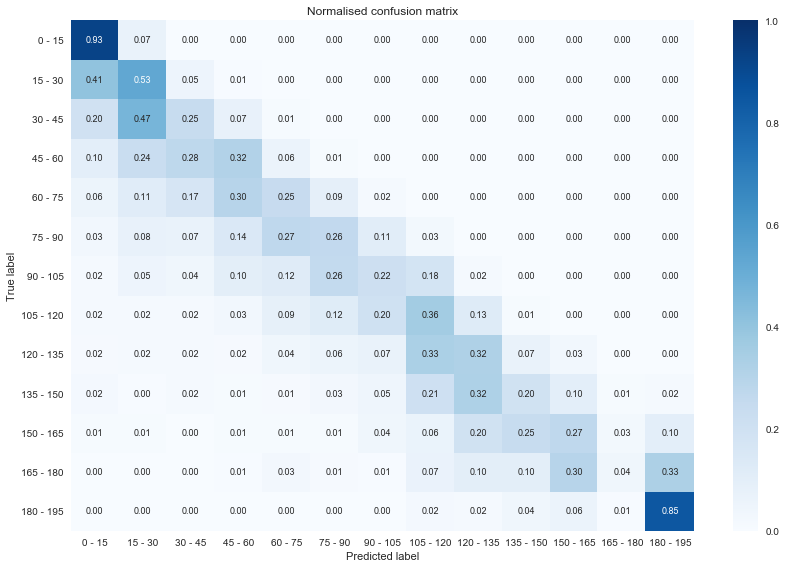

In [35]:
# Plot confusion matrix by using seaborn heatmap function
def plot_confusion_matrix(cm, normalize=False, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix.
    
    If normalize is set to True, the rows of the confusion matrix are normalized so that they sum up to 1.
    
    """
    if normalize is True:
        cm = cm/cm.sum(axis=1)[:, np.newaxis]
        vmin, vmax = 0., 1.
        fmt = '.2f'
    else:
        vmin, vmax = None, None
        fmt = 'd'
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=vmin, vmax=vmax, 
                    annot=True, annot_kws={"fontsize":9}, fmt=fmt, cmap=plt.cm.Blues)
    else:
        sns.heatmap(cm,xticklabels=classes, yticklabels=classes, vmin=0., vmax=1.,annot=True, annot_kws={"fontsize":9}, fmt=fmt, cmap=plt.cm.Blues)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_test, clf.predict(X_test_sc))

y_label = []
for i in range(0,13):
    start = i*15
    end = start + 15
    name = str(int(start)) +' - ' + str(int(end))
    y_label.append(name)
    
# Your code goes here
fig = plt.figure(figsize=(12,8))
ax2 = fig.add_subplot(111)
plot_confusion_matrix(cm, normalize=True, \
                      classes=y_label, title='Normalised confusion matrix') # normalized

fig.tight_layout()